In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data=pd.read_csv("/content/online_courses_uses.csv")



In [58]:
data.head()

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            10000 non-null  int64  
 1   Course_Name          10000 non-null  object 
 2   Category             10000 non-null  object 
 3   Duration (hours)     10000 non-null  int64  
 4   Enrolled_Students    10000 non-null  int64  
 5   Completion_Rate (%)  10000 non-null  float64
 6   Platform             10000 non-null  object 
 7   Price ($)            10000 non-null  float64
 8   Rating (out of 5)    10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


In [60]:
data.columns

Index(['Course_ID', 'Course_Name', 'Category', 'Duration (hours)',
       'Enrolled_Students', 'Completion_Rate (%)', 'Platform', 'Price ($)',
       'Rating (out of 5)'],
      dtype='object')

In [61]:
data['Category'].value_counts()

Category
Business        1148
Office Tools    1139
Marketing       1126
Finance         1124
Design          1112
AI              1104
Data Science    1098
Programming     1076
Technology      1073
Name: count, dtype: int64

In [62]:
data.isnull().sum()

Course_ID              0
Course_Name            0
Category               0
Duration (hours)       0
Enrolled_Students      0
Completion_Rate (%)    0
Platform               0
Price ($)              0
Rating (out of 5)      0
dtype: int64

In [63]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [64]:
data['Category'].value_counts().head(10)


Category
Business        1148
Office Tools    1139
Marketing       1126
Finance         1124
Design          1112
AI              1104
Data Science    1098
Programming     1076
Technology      1073
Name: count, dtype: int64

In [65]:
data.drop_duplicates(keep="first")

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968
...,...,...,...,...,...,...,...,...,...
9995,9996,Course_9996,AI,87,482,55.407463,Udemy,155.965331,4.155649
9996,9997,Course_9997,Data Science,96,2029,93.093483,Coursera,151.022434,4.037755
9997,9998,Course_9998,AI,25,136,90.279510,LinkedIn Learning,101.155089,3.603868
9998,9999,Course_9999,Programming,46,3258,73.720149,edX,101.143232,3.825781


In [66]:
data.describe()

,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,55.144000,2530.653000,75.119729,106.391332,3.994154
std,2886.89568,26.199242,1423.808243,14.462138,55.100685,0.575502
min,1.00000,10.000000,101.000000,50.008183,10.037145,3.000026
25%,2500.75000,32.000000,1289.000000,62.629516,58.613731,3.490250
50%,5000.50000,55.000000,2532.000000,75.156568,108.042392,4.002789
75%,7500.25000,78.000000,3764.000000,87.595268,153.945558,4.483662
max,10000.00000,100.000000,5000.000000,99.994300,199.962412,4.999176


In [67]:
#Q5: For a numerical column of your choice, calculate the mean, median, and standard deviation.
data.groupby('Category')['Price ($)'].agg(['mean','median','std'])

,mean,median,std
Category,,,
AI,104.695098,105.658833,55.062837
Business,102.499106,103.639435,55.416160
Data Science,110.170669,114.211863,55.116883
Design,106.717894,108.930302,54.307665
Finance,106.771382,107.647837,56.022024
Marketing,105.380775,106.214455,54.509257
Office Tools,107.981911,110.397083,54.563805
Programming,109.475623,112.285805,55.473177
Technology,103.976057,101.192523,55.159512


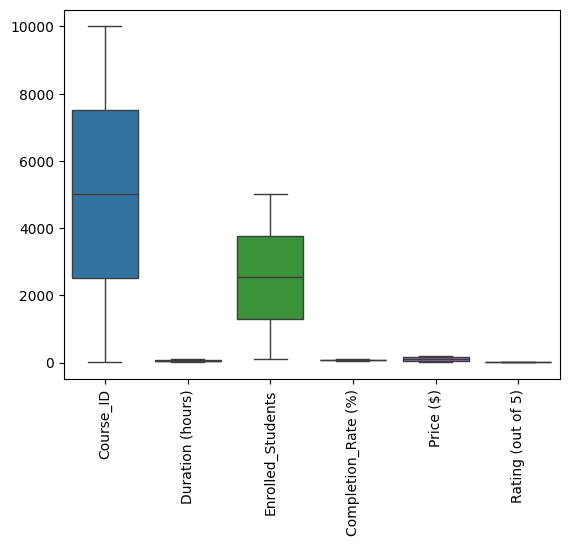

In [68]:
#Q6: Identify any potential outliers in a numerical column of your choice. Explain your approach.
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

 The graph visually compares course duration and completion rates. While courses take varying lengths of time, completion rates tend to cluster around lower percentages

In [69]:
numerical_data = data.select_dtypes(include=['number'])
numerical_data.head()

,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
0,1,21,4217,50.646827,38.797425,4.811252
1,2,57,4238,82.240240,160.650991,3.829329
2,3,52,2700,55.729028,123.503781,4.851950
3,4,69,4308,58.664729,116.775704,3.913732
4,5,43,4792,62.598147,96.246696,4.921968


In [70]:
numerical_data.head()

,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
0,1,21,4217,50.646827,38.797425,4.811252
1,2,57,4238,82.240240,160.650991,3.829329
2,3,52,2700,55.729028,123.503781,4.851950
3,4,69,4308,58.664729,116.775704,3.913732
4,5,43,4792,62.598147,96.246696,4.921968


In [71]:
#7.Find the correlation between numerical columns and discuss any interesting relationships.
corr_mat=numerical_data.corr()
corr_mat



,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
Course_ID,1.000000,0.006018,0.007856,0.008773,0.000107,0.002656
Duration (hours),0.006018,1.000000,0.005532,0.013285,0.002908,-0.010197
Enrolled_Students,0.007856,0.005532,1.000000,-0.020396,-0.003204,-0.014243
Completion_Rate (%),0.008773,0.013285,-0.020396,1.000000,-0.016451,-0.004781
Price ($),0.000107,0.002908,-0.003204,-0.016451,1.000000,-0.007291
Rating (out of 5),0.002656,-0.010197,-0.014243,-0.004781,-0.007291,1.000000


In [72]:
#Group the data by a categorical column and compute the aggregate statistics (e.g., mean, sum) for a numerical column.
data.groupby('Category')['Completion_Rate (%)'].agg(['mean','median','std'])

,mean,median,std
Category,,,
AI,75.011716,75.416500,14.478338
Business,74.972451,74.825670,14.620371
Data Science,75.343010,75.697638,14.257794
Design,75.429409,75.604648,14.316388
Finance,75.235829,75.108794,14.040517
Marketing,74.691278,74.402790,14.698240
Office Tools,74.641310,74.122137,14.678988
Programming,75.632548,76.791827,14.801438
Technology,75.160604,75.221214,14.263866


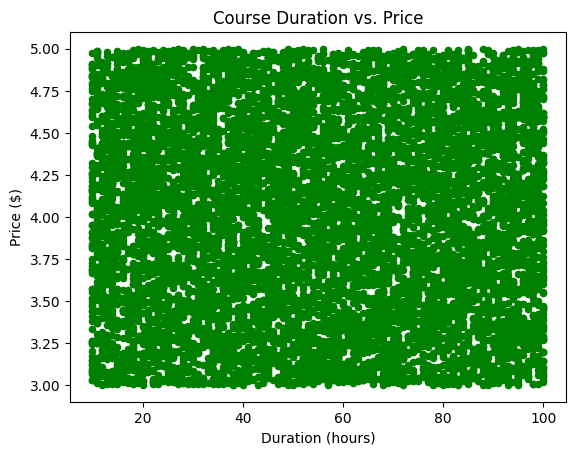

<Figure size 1000x600 with 0 Axes>

In [73]:
import matplotlib.pyplot as plt

data.plot.scatter('Duration (hours)', 'Rating (out of 5)', color='green')
plt.title('Course Duration vs. Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price ($)')
plt.figure(figsize=(10, 6))
plt.show()

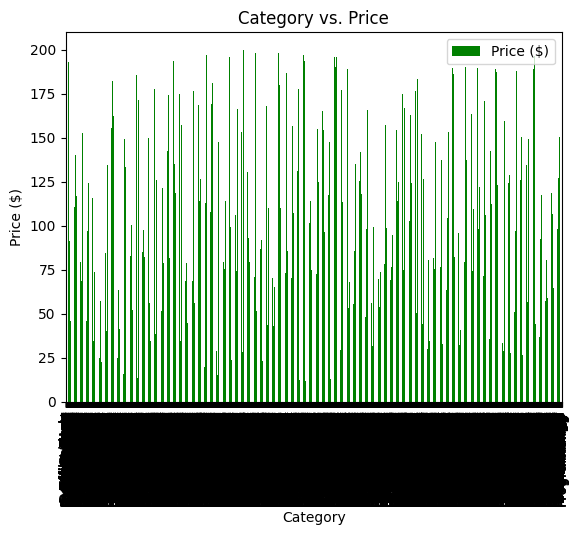

<Figure size 1000x600 with 0 Axes>

In [78]:
data.plot.bar('Category', 'Price ($)', color='green')
plt.title('Category vs. Price')
plt.xlabel('Category')
plt.ylabel('Price ($)')
plt.figure(figsize=(10, 6))
plt.show()

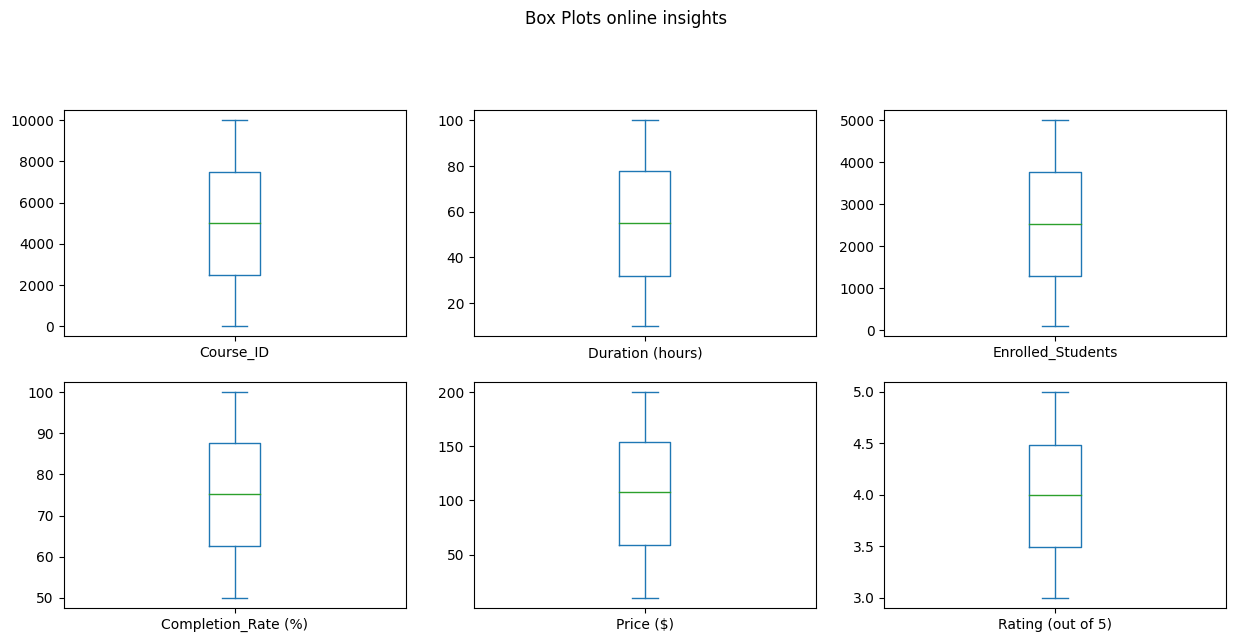

In [76]:
data.plot.box(subplots=True, figsize=(15, 10),layout=(3, 3))
plt.suptitle('Box Plots online insights')
plt.show()

**Conclusion:**
Courses tend to have long durations, moderate enrollment, low completion rates, varying prices, and generally positive rating